Import Libraries

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import plotly.express as px
import plotly.graph_objects as go
import plotly
plotly.offline.init_notebook_mode(connected = True)

Load Datasets

In [3]:
items_cats = pd.read_csv('data/item_categories.csv')
items = pd.read_csv('data/items.csv')
sales_train = pd.read_csv('data/sales_train.csv')
sample_submission = pd.read_csv('data/sample_submission.csv')
shops = pd.read_csv('data/shops.csv')
test = pd.read_csv('data/test.csv')

In [4]:
sales_train.head()
test.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [5]:
items_cats.head()
items.head()
shops.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


Will need to merge several tables into one for easier reference

In [6]:
sales_item = sales_train.merge(items, on='item_id', how='left') # gains item_name and cat_id per item_id on the train set
sales_item_shops = sales_item.merge(shops, on='shop_id', how='left') # gains shop name per shop_id on the train set
df = sales_item_shops.merge(items_cats, on='item_category_id', how='left') # gain item_cat_name per cat_id on the train set
df.sample(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name
646225,23.07.2013,6,26,10782,249.0,1.0,ДДТ Метель августа (фирм.),55,"Москва ТЦ ""Ареал"" (Беляево)",Музыка - CD локального производства
2211554,31.12.2014,23,58,18622,169.0,1.0,СЕМЕЙКА КРУДС,40,"Якутск ТЦ ""Центральный""",Кино - DVD
498672,09.05.2013,4,59,3362,499.0,1.0,"FIFA Manager 13 [PC, английская версия]",30,"Ярославль ТЦ ""Альтаир""",Игры PC - Стандартные издания
1699072,28.05.2014,16,48,1077,699.0,1.0,47 РОНИНОВ (BD),37,"Томск ТРЦ ""Изумрудный Город""",Кино - Blu-Ray
285269,27.03.2013,2,21,6738,699.0,1.0,StarCraft II: Heart of the Swarm (дополнение) ...,30,"Москва МТРЦ ""Афи Молл""",Игры PC - Стандартные издания
2404440,30.01.2015,24,54,13851,169.0,1.0,ЛЕДНИКОВЫЙ ПЕРИОД 4:КОНТИНЕНТАЛЬНЫЙ ДРЕЙФ,40,"Химки ТЦ ""Мега""",Кино - DVD
735412,05.08.2013,7,57,18279,299.0,1.0,СБ. Блатной рай Юбилейный (mp3-CD) (jewel),57,"Якутск Орджоникидзе, 56",Музыка - MP3
1103336,28.11.2013,10,56,17346,399.0,2.0,ПРИЗРАЧНЫЙ ПАТРУЛЬ,40,"Чехов ТРЦ ""Карнавал""",Кино - DVD
1253494,29.12.2013,11,42,11496,169.0,1.0,ЖИЗНЬ ПИ,40,"СПб ТК ""Невский Центр""",Кино - DVD
424254,21.04.2013,3,31,6740,499.0,1.0,"StarCraft II: Wings of Liberty [PC, Jewel, рус...",30,"Москва ТЦ ""Семеновский""",Игры PC - Стандартные издания


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   date_block_num      int64  
 2   shop_id             int64  
 3   item_id             int64  
 4   item_price          float64
 5   item_cnt_day        float64
 6   item_name           object 
 7   item_category_id    int64  
 8   shop_name           object 
 9   item_category_name  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 246.4+ MB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
date_block_num,2935849.0,14.569911,9.422988,0.0,7.0,14.0,23.0,33.0
shop_id,2935849.0,33.001728,16.226973,0.0,22.0,31.0,47.0,59.0
item_id,2935849.0,10197.227057,6324.297354,0.0,4476.0,9343.0,15684.0,22169.0
item_price,2935849.0,890.853233,1729.799631,-1.0,249.0,399.0,999.0,307980.0
item_cnt_day,2935849.0,1.242641,2.618834,-22.0,1.0,1.0,1.0,2169.0
item_category_id,2935849.0,40.001383,17.100759,0.0,28.0,40.0,55.0,83.0


Here we can see anomalies in the data: 
* a negative value for the price 
* a negative quantity of goods sold per day.

In [9]:
print('Count of rows with abnormal price: {:.0f}'.format(len(df[df['item_price'] <= 0])))
print('Count of rows with abnormal quantity of goods sold per day: {:.0f}'.format(len(df[df['item_cnt_day'] < 0])))

Count of rows with abnormal price: 1
Count of rows with abnormal quantity of goods sold per day: 7356


In [10]:
print('Fraction of Anomalies in Dataset: ',7357/2935849*100,'%')

Fraction of Anomalies in Dataset:  0.25059190714508817 %


Remove all rows with anomalies.

In [11]:
df = df[~(df['item_price'] <= 0) & ~(df['item_cnt_day'] < 0)]
df.describe(include = ['object']).T

,count,unique,top,freq
date,2928492,1034,28.12.2013,9415
item_name,2928492,21804,Фирменный пакет майка 1С Интерес белый (34*42)...,31337
shop_name,2928492,60,"Москва ТЦ ""Семеновский""",235185
item_category_name,2928492,84,Кино - DVD,563938


In [12]:
print(f'Count duplicates: {df.duplicated().sum()}')
df = df.drop_duplicates()

Count duplicates: 6


In [13]:
df.sample(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name
1726519,18.06.2014,17,7,6117,399.0,1.0,"Resident Evil 4: Ultimate HD Edition [PC, Jewe...",30,"Воронеж ТРЦ ""Максимир""",Игры PC - Стандартные издания
2454769,16.02.2015,25,19,5361,28.0,1.0,"Of Orcs and Men [PC, Jewel, русские субтитры]",30,"Курск ТЦ ""Пушкинский""",Игры PC - Стандартные издания
632506,10.07.2013,6,27,17191,199.0,1.0,ПОКАХОНТАС 2. ПУТЕШЕСТВИЕ В НОВЫЙ СВЕТ (BD),37,"Москва ТЦ ""МЕГА Белая Дача II""",Кино - Blu-Ray
2641374,25.05.2015,28,28,10453,449.0,1.0,ГОЛОДНЫЕ ИГРЫ. СОЙКА ПЕРЕСМЕШНИЦА Часть 1,40,"Москва ТЦ ""МЕГА Теплый Стан"" II",Кино - DVD
1132573,30.12.2013,11,26,14549,149.0,1.0,МЕСТО ВСТРЕЧИ ИЗМЕНИТЬ НЕЛЬЗЯ э (BD),37,"Москва ТЦ ""Ареал"" (Беляево)",Кино - Blu-Ray


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928486 entries, 0 to 2935848
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   date_block_num      int64  
 2   shop_id             int64  
 3   item_id             int64  
 4   item_price          float64
 5   item_cnt_day        float64
 6   item_name           object 
 7   item_category_id    int64  
 8   shop_name           object 
 9   item_category_name  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 245.8+ MB


In [15]:
df['date'] = df['date'].astype('datetime64[Y]')

print('Min date:', df['date'].min().date())
print('Max date', df['date'].max().date())

Min date: 2013-01-01
Max date 2015-01-01


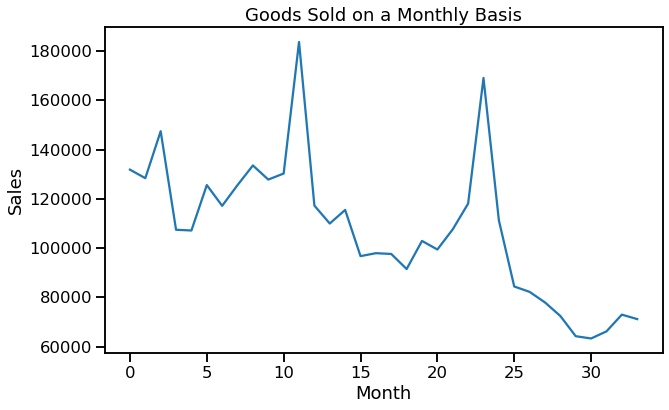

In [41]:
df_cnt_item = df.groupby('date_block_num').agg({'item_cnt_day':'sum'}).reset_index().rename(columns={'date_block_num':'number_of_month', 'item_cnt_day':'item_cnt'})
fig,ax=plt.subplots(figsize=(10,6));
plt.rcParams.update({'font.size': 12});
sns.lineplot(data=df_cnt_item, x="number_of_month", y="item_cnt", ax=ax);
ax.set_xlabel('Month');
ax.set_ylabel('Sales');
ax.set_title('Goods Sold on a Monthly Basis');

In the graph we see two sales peaks - in December 2013 (183. thousand) and December 2014 (169. thousand) . This is the time when people make the most purchases for New Year's Eve gifts.

In [42]:
df['sum_price'] = df.item_price * df.item_cnt_day

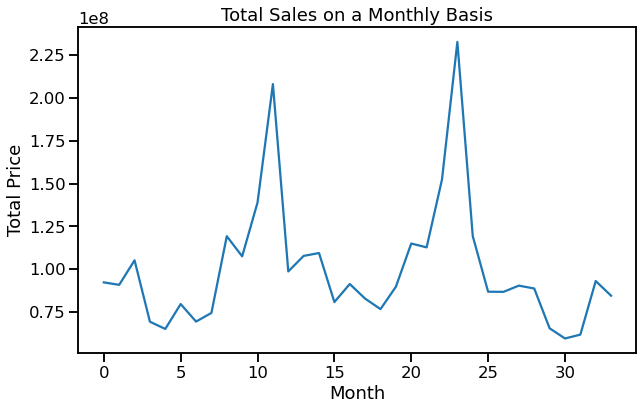

In [45]:
df_sales_sum = df.groupby('date_block_num').agg({'sum_price':'sum'}).reset_index().rename(columns={'date_block_num':'number_of_month', 'sum_price':'total_sales'})
fig, ax = plt.subplots(figsize=(10,6));
sns.lineplot(data=df_sales_sum, x='number_of_month', y='total_sales');
ax.set_xlabel('Month');
ax.set_ylabel('Total Price');
ax.set_title('Total Sales on a Monthly Basis');

In December 2014, there were fewer purchases than in December 2013, but they were more expensive. There is a clear seasonality in the data.

In [46]:
top_categories = df.groupby('item_category_id').agg({'item_id':'nunique'}).reset_index().rename(columns={'item_id':'count_items'}).sort_values(by='count_items', ascending=False).head(10)

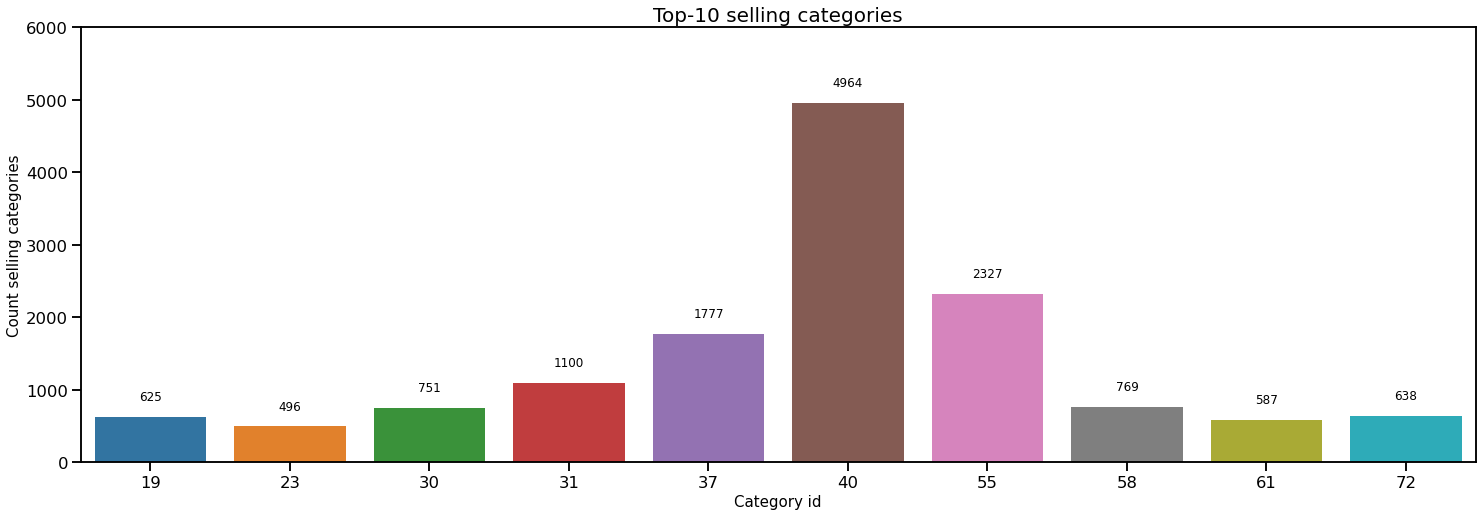

In [48]:
plt.figure(figsize=(25,8));
plt.title('Top-10 selling categories', size=20);
ax = sns.barplot(y=top_categories['count_items'], 
                 x=top_categories['item_category_id']);
for p in ax.patches:
        ax.annotate (str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', rotation=0, xytext=(0, 20), textcoords='offset points');
plt.xlabel('Category id', size=15);
plt.ylabel('Count selling categories', size=15);
plt.ylim(None,6000);
plt.show();

Most goods were sold from category 40 - 4964 items during the whole period of the survey. In second place is category 55 with 2327 items and in third place the category 37 with 1777 items sold.

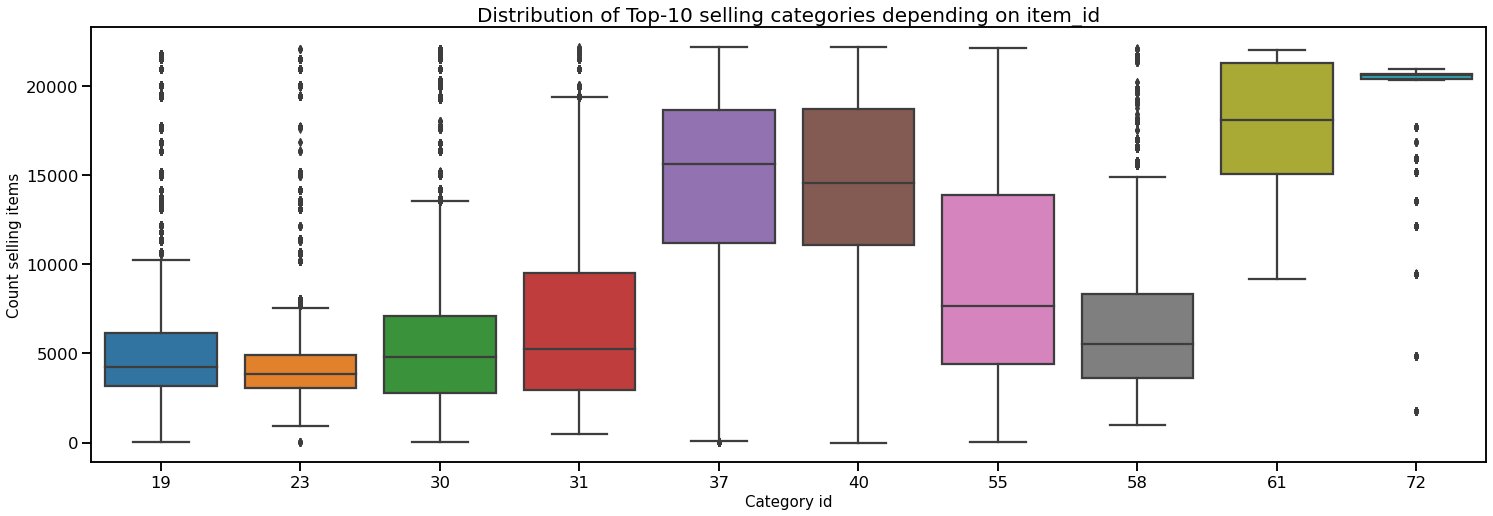

In [50]:
distribution_categories = df[df['item_category_id'].isin(top_categories['item_category_id'])]

plt.figure(figsize=(25,8));
plt.title('Distribution of Top-10 selling categories depending on item_id', size=20);
ax = sns.boxplot(x="item_category_id", y="item_id", data=distribution_categories);
plt.xlabel('Category id', size=15);
plt.ylabel('Count selling items', size=15);
plt.show();

The greatest variation in values is observed for items in categories 37, 40 and 55. However, the categories 40 and 55 have no outliers. Goods in categories 19, 23 and 72 have the most abnormal values.

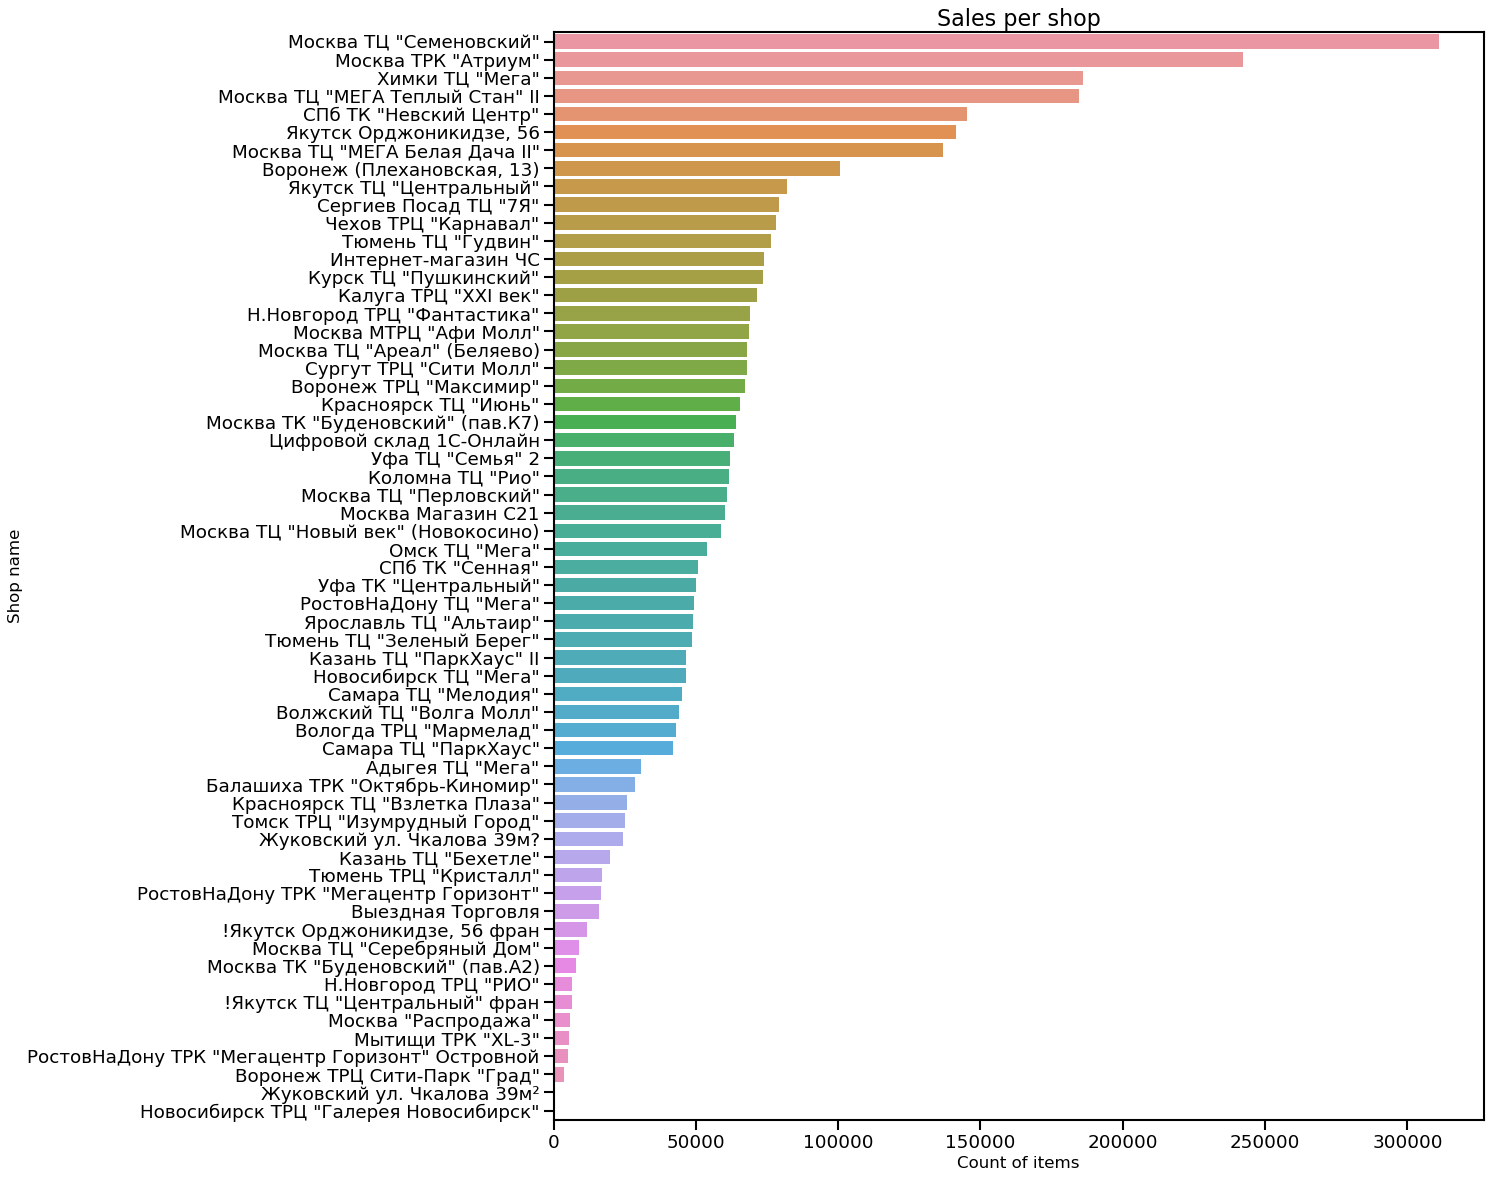

In [57]:
items_per_shop = df.groupby('shop_name').agg({'item_cnt_day':'sum'}).reset_index().rename(columns={'item_cnt_day':'total_cnt_items'}).sort_values(by='total_cnt_items', ascending=False)

plt.figure(figsize=(15,18), dpi=80);
plt.title('Sales per shop', size=20);
ax = sns.barplot(x=items_per_shop['total_cnt_items'], y=items_per_shop['shop_name']);
plt.xlabel('Count of items', size=15);
plt.ylabel('Shop name', size=15);
plt.show();

Most goods were sold from the shop in Москва ТЦ "Семеновский" during the entire period.

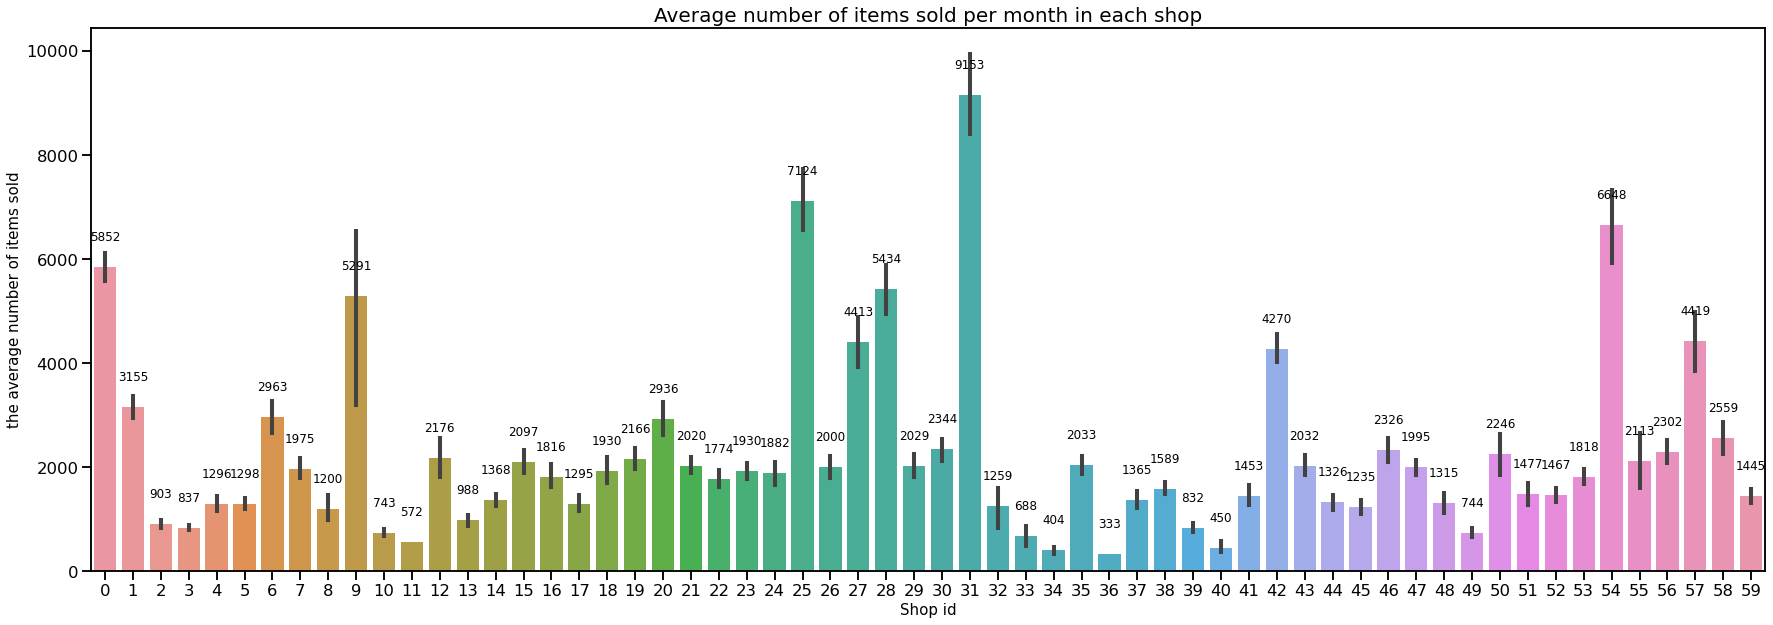

In [59]:
cnt_items_shop_monthly = df.groupby(['shop_id', 'date_block_num']).agg({'item_cnt_day':'sum'}).reset_index().sort_values(by='item_cnt_day', ascending=False)

plt.figure(figsize=(30,10));
plt.title('Average number of items sold per month in each shop', size=20);
ax = sns.barplot(y=cnt_items_shop_monthly['item_cnt_day'], 
                 x=cnt_items_shop_monthly['shop_id']);
for p in ax.patches:
        ax.annotate (str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', rotation=0, xytext=(0, 30), textcoords='offset points');
plt.xlabel('Shop id', size=15);
plt.ylabel('the average number of items sold', size=15);
plt.show();

On average, shop 31 sold about 9,153 items monthly. Shop 25 sold 7,124 items and Shop 54 sold 6,648 items monthly. From the number of sales we can judge the size of the shop, so it is likely - they are the largest in our sample.

## Conclusions
* There are two sales peaks in the data - in December 2013 (183. thousand) and December 2014 (169. thousand) . This is the time when people make the most purchases for New Year's Eve gifts.
* In December 2014, there were fewer purchases than in December 2013, but they were more expensive. There is a clear seasonality in the data.
* Most goods were sold from category 40 - 4964 items during the whole period of the survey. In second place is category 55 with 2327 items and in third place the category 37 with 1777 items sold.
* The greatest variation in values is observed for items in categories 37, 40 and 55. However, the categories 40 and 55 have no outliers. Goods in categories 19, 23 and 72 have the most abnormal values.
* Most goods were sold from the shop in Москва ТЦ "Семеновский" during the entire period.
* On average, shop 31 sold about 9,153 items monthly. Shop 25 sold 7,124 items and Shop 54 sold 6,648 items monthly. From the number of sales we can judge the size of the shop, so it is likely - they are the largest in our sample.